# Profilling Manta Ray
Subtitle: Repentence for my Excitement Learning a new Language

Here goes my first attempt at debugging and profilling a relatively complex Julia Program. I'll be sticking to the V1.0 docs for improving my code, mainly focused on type stability. I found Traceur is a good jumping off point to get insights about your code.

Please keep in mind, I'm largely a Julia Noob. If there's something you take issue with, I firmly believe in a growth mindset. :P

First let's activate our project. If you've checked out my repo this should be in the `notebooks` directory. Then we'll include Revise <3, Traceur, and our project code.

In [22]:
using Pkg; Pkg.activate("../")

"D:\\Projects\\Julia\\MantaRay\\Project.toml"

In [23]:
using Revise; using Traceur; using MantaRay

### Vec3 - Our Immutable Workhorse

We'll start with Vec3. This struct is SUPER simple
```
struct Vec3{T <: Real}
    x::T
    y::T
    z::T
end
```
Three components, all must be subtypes, as indicated by the `T <: Real` statement. Looks fine, we'll run some tests with `@time` and report back.

Oh and we'll need Gadfly.jl as well for plotting.

In [24]:
Pkg.add("OrderedCollections"); Pkg.add("Gadfly");

 Resolving package versions...
  Updating `D:\Projects\Julia\MantaRay\Project.toml`
 [no changes]
  Updating `D:\Projects\Julia\MantaRay\Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `D:\Projects\Julia\MantaRay\Project.toml`
 [no changes]
  Updating `D:\Projects\Julia\MantaRay\Manifest.toml`
 [no changes]


In [25]:
@time Vec3(1.0)

  0.000005 seconds (5 allocations: 192 bytes)


Vec3{Float64}(1.0, 1.0, 1.0)

In [26]:
@time Vec3()

  0.000006 seconds (4 allocations: 160 bytes)


Vec3{Float64}(0.0, 0.0, 0.0)

In [27]:
@time Vec3(1.0, 1.0, 1.0)

  0.000005 seconds (5 allocations: 192 bytes)


Vec3{Float64}(1.0, 1.0, 1.0)

In [28]:
@time Vec3{Float64}(1.0, 1.0, 1.0)

  0.000007 seconds (5 allocations: 192 bytes)


Vec3{Float64}(1.0, 1.0, 1.0)

Looks alright, comparable to a normal struct. Since it's immutable we'll see a speed up in computation. Let's profile some basic functionality, we'll use some behind the scenes macros you should know about.

In [33]:
@time Vec3(1.0) + Vec3(0.0)

  0.000019 seconds (28 allocations: 960 bytes)


Vec3{Float64}(1.0, 1.0, 1.0)

In [16]:
v1, v2 = Vec3(1.0) + Vec3(0.0)
@time v1 + v2

  0.000002 seconds (5 allocations: 176 bytes)


2.0

For some reason I can't get any output from Traceur in notebook form, so I'll copy from a REPL.

```
julia> @trace v1 + v2
┌ Warning: dynamic dispatch to (+)((Base.arrayref)(false, $(Expr(:foreigncall, :jl_alloc_array_1d, Array{Any,1}, svec(Any, Int64), :ccall, 2, Array{Any,1}, 3, 3)), (Base.Broadcast.ifelse)((Base.not_int)((Base.ifelse)((Base.slt_int)((Base.arraysize)($(Expr(:foreigncall, :jl_alloc_array_1d, Array{Any,1}, svec(Any, Int64), :ccall, 2, Array{Any,1}, 3, 3)), 1), 0), 0, (Base.arraysize)($(Expr(:foreigncall, :jl_alloc_array_1d, Array{Any,1}, svec(Any, Int64), :ccall, 2, Array{Any,1}, 3, 3)), 1)) === 1), φ (%156 => 1), 1)), (Base.arrayref)(false, $(Expr(:foreigncall, :jl_alloc_array_1d, Array{Any,1}, svec(Any, Int64), :ccall, 2, Array{Any,1}, 3, 3)), (Base.Broadcast.ifelse)((Base.not_int)((Base.ifelse)((Base.slt_int)((Base.arraysize)($(Expr(:foreigncall, :jl_alloc_array_1d, Array{Any,1}, svec(Any, Int64), :ccall, 2, Array{Any,1}, 3, 3)), 1), 0), 0, (Base.arraysize)($(Expr(:foreigncall, :jl_alloc_array_1d, Array{Any,1}, svec(Any, Int64), :ccall, 2, Array{Any,1}, 3, 3)), 1)) === 1), φ (%156 => 1), 1)))
└ @ D:\Projects\Julia\MantaRay\src\Vec3.jl:578
┌ Warning: dynamic dispatch to (Base.Broadcast.similar)(%new(Base.Broadcast.Broadcasted{Base.Broadcast.DefaultArrayStyle{1},Tuple{Base.OneTo{Int64}},typeof(+),Tuple{Base.Broadcast.Extruded{Array{Any,1},Tuple{Bool},Tuple{Int64}},Base.Broadcast.Extruded{Array{Any,1},Tuple{Bool},Tuple{Int64}}}}, +, (Core.tuple)(%new(Base.Broadcast.Extruded{Array{Any,1},Tuple{Bool},Tuple{Int64}}, $(Expr(:foreigncall, :jl_alloc_array_1d, Array{Any,1}, svec(Any, Int64), :ccall, 2, Array{Any,1}, 3, 3)), (Core.tuple)((Base.not_int)((Base.ifelse)((Base.slt_int)((Base.arraysize)($(Expr(:foreigncall, :jl_alloc_array_1d, Array{Any,1}, svec(Any, Int64), :ccall, 2, Array{Any,1}, 3, 3)), 1), 0), 0, (Base.arraysize)($(Expr(:foreigncall, :jl_alloc_array_1d, Array{Any,1}, svec(Any, Int64), :ccall, 2, Array{Any,1}, 3, 3)), 1)) === 1)), (Core.tuple)(1)), %new(Base.Broadcast.Extruded{Array{Any,1},Tuple{Bool},Tuple{Int64}}, $(Expr(:foreigncall, :jl_alloc_array_1d, Array{Any,1}, svec(Any, Int64), :ccall, 2, Array{Any,1}, 3, 3)), (Core.tuple)((Base.not_int)((Base.ifelse)((Base.slt_int)((Base.arraysize)($(Expr(:foreigncall, :jl_alloc_array_1d, Array{Any,1}, svec(Any, Int64), :ccall, 2, Array{Any,1}, 3, 3)), 1), 0), 0, (Base.arraysize)($(Expr(:foreigncall, :jl_alloc_array_1d, Array{Any,1}, svec(Any, Int64), :ccall, 2, Array{Any,1}, 3, 3)), 1)) === 1)), (Core.tuple)(1))), (Core.tuple)(φ (%112 => %103, %121 => %99))), (Base.Broadcast.typeof)((+)((Base.arrayref)(false, $(Expr(:foreigncall, :jl_alloc_array_1d, Array{Any,1}, svec(Any, Int64), :ccall, 2, Array{Any,1}, 3, 3)), (Base.Broadcast.ifelse)((Base.not_int)((Base.ifelse)((Base.slt_int)((Base.arraysize)($(Expr(:foreigncall, :jl_alloc_array_1d, Array{Any,1}, svec(Any, Int64), :ccall, 2, Array{Any,1}, 3,
3)), 1), 0), 0, (Base.arraysize)($(Expr(:foreigncall, :jl_alloc_array_1d, Array{Any,1}, svec(Any, Int64), :ccall, 2, Array{Any,1}, 3, 3)), 1)) === 1), φ (%156 => 1), 1)), (Base.arrayref)(false, $(Expr(:foreigncall, :jl_alloc_array_1d, Array{Any,1}, svec(Any, Int64), :ccall, 2, Array{Any,1}, 3, 3)), (Base.Broadcast.ifelse)((Base.not_int)((Base.ifelse)((Base.slt_int)((Base.arraysize)($(Expr(:foreigncall, :jl_alloc_array_1d, Array{Any,1}, svec(Any, Int64), :ccall, 2, Array{Any,1}, 3, 3)), 1), 0), 0, (Base.arraysize)($(Expr(:foreigncall, :jl_alloc_array_1d, Array{Any,1}, svec(Any, Int64), :ccall, 2, Array{Any,1}, 3, 3)), 1)) === 1), φ (%156 => 1), 1)))))
└ @ D:\Projects\Julia\MantaRay\src\Vec3.jl:788
┌ Warning: dynamic dispatch to (Base.setindex!)(φ (%185 => %184, %187 => %186), (+)((Base.arrayref)(false, $(Expr(:foreigncall, :jl_alloc_array_1d, Array{Any,1}, svec(Any, Int64), :ccall, 2, Array{Any,1}, 3, 3)), (Base.Broadcast.ifelse)((Base.not_int)((Base.ifelse)((Base.slt_int)((Base.arraysize)($(Expr(:foreigncall, :jl_alloc_array_1d, Array{Any,1}, svec(Any, Int64), :ccall, 2, Array{Any,1}, 3, 3)), 1), 0), 0, (Base.arraysize)($(Expr(:foreigncall, :jl_alloc_array_1d, Array{Any,1}, svec(Any, Int64), :ccall, 2, Array{Any,1}, 3, 3)), 1)) === 1), φ (%156 => 1), 1)), (Base.arrayref)(false, $(Expr(:foreigncall, :jl_alloc_array_1d, Array{Any,1}, svec(Any, Int64), :ccall, 2, Array{Any,1}, 3, 3)), (Base.Broadcast.ifelse)((Base.not_int)((Base.ifelse)((Base.slt_int)((Base.arraysize)($(Expr(:foreigncall, :jl_alloc_array_1d, Array{Any,1}, svec(Any, Int64), :ccall, 2, Array{Any,1}, 3, 3)), 1), 0), 0, (Base.arraysize)($(Expr(:foreigncall, :jl_alloc_array_1d, Array{Any,1}, svec(Any, Int64), :ccall, 2, Array{Any,1}, 3, 3)), 1)) === 1), φ (%156
=> 1), 1))), φ (%156 => 1))
└ @ D:\Projects\Julia\MantaRay\src\Vec3.jl:789
┌ Warning: dynamic dispatch to (Base.Broadcast.copyto_nonleaf!)(φ (%185 => %184, %187 => %186), %new(Base.Broadcast.Broadcasted{Base.Broadcast.DefaultArrayStyle{1},Tuple{Base.OneTo{Int64}},typeof(+),Tuple{Base.Broadcast.Extruded{Array{Any,1},Tuple{Bool},Tuple{Int64}},Base.Broadcast.Extruded{Array{Any,1},Tuple{Bool},Tuple{Int64}}}}, +, (Core.tuple)(%new(Base.Broadcast.Extruded{Array{Any,1},Tuple{Bool},Tuple{Int64}}, $(Expr(:foreigncall, :jl_alloc_array_1d, Array{Any,1}, svec(Any, Int64), :ccall, 2, Array{Any,1}, 3, 3)), (Core.tuple)((Base.not_int)((Base.ifelse)((Base.slt_int)((Base.arraysize)($(Expr(:foreigncall, :jl_alloc_array_1d, Array{Any,1}, svec(Any, Int64), :ccall, 2, Array{Any,1}, 3, 3)), 1), 0), 0, (Base.arraysize)($(Expr(:foreigncall, :jl_alloc_array_1d, Array{Any,1}, svec(Any, Int64), :ccall, 2, Array{Any,1}, 3, 3)), 1)) === 1)), (Core.tuple)(1)),
%new(Base.Broadcast.Extruded{Array{Any,1},Tuple{Bool},Tuple{Int64}}, $(Expr(:foreigncall, :jl_alloc_array_1d, Array{Any,1}, svec(Any, Int64), :ccall, 2, Array{Any,1}, 3, 3)), (Core.tuple)((Base.not_int)((Base.ifelse)((Base.slt_int)((Base.arraysize)($(Expr(:foreigncall, :jl_alloc_array_1d, Array{Any,1}, svec(Any, Int64), :ccall, 2, Array{Any,1}, 3, 3)), 1), 0), 0, (Base.arraysize)($(Expr(:foreigncall, :jl_alloc_array_1d, Array{Any,1}, svec(Any, Int64), :ccall, 2, Array{Any,1}, 3, 3)), 1)) === 1)), (Core.tuple)(1))), (Core.tuple)(φ (%112 => %103, %121 => %99))), φ (%112 => %103, %121 => %99), φ (%156 => 1), 1)
└ @ D:\Projects\Julia\MantaRay\src\Vec3.jl:791
┌ Warning: dynamic dispatch to (MantaRay.Vec3)(φ (%162 => %161, %191 => %190))
└ @ D:\Projects\Julia\MantaRay\src\Vec3.jl:94
Vec3{Float64}(1.0, 1.0, 1.0)
```

### OOOF, that's a lot of warnings.

It more than likely has to do with the fancy way in which I'm doing vector operations.

```
""" Vector addition """
function +(a::Vec3, b::Vec3)
    # NB: this is basically just .+ with a cast because we made these types iterable.
    return Vec3(a .+ b)
end
```
The dot operator is a broadcast function which will essentially do an element-wise call of what ever operand is after it. I made the Vec3 class iterable for this to work.
Looking back, it was a case of "WOW I'm a LEET Julia coder, let's do broadcasting for all the things!" 
Nevertheless, let's rework that function. Keep in mind since Vec3 is immutable, any operations will require returning a new struct.

In [17]:
function new_add(a::Vec3, b::Vec3)
    return Vec3(a.x + b.x, a.y + b.y, a.z + b.z)
end

new_add (generic function with 1 method)

In [22]:
v1, v2 = Vec3(1.0), Vec3(0.0)
@time new_add(v1, v2)

  0.000002 seconds (5 allocations: 192 bytes)


Vec3{Float64}(1.0, 1.0, 1.0)

In [25]:
@code_warntype new_add(v1, v2)

Body::Vec3{Float64}
1 ─ %1  = (Base.getfield)(a, :x)::Float64
│   %2  = (Base.getfield)(b, :x)::Float64
│   %3  = (Base.add_float)(%1, %2)::Float64
│   %4  = (Base.getfield)(a, :y)::Float64
│   %5  = (Base.getfield)(b, :y)::Float64
│   %6  = (Base.add_float)(%4, %5)::Float64
│   %7  = (Base.getfield)(a, :z)::Float64
│   %8  = (Base.getfield)(b, :z)::Float64
│   %9  = (Base.add_float)(%7, %8)::Float64
│   %10 = %new(Vec3{Float64}, %3, %6, %9)::Vec3{Float64}
└──       return %10


In [24]:
@code_native new_add(v1, v2)

	.text
; ┌ @ In[17]:2 within `new_add'
	pushq	%rbp
	movq	%rsp, %rbp
; │┌ @ float.jl:395 within `+'
	vmovupd	(%rdx), %xmm0
	vaddpd	(%r8), %xmm0, %xmm0
	vmovsd	16(%rdx), %xmm1         # xmm1 = mem[0],zero
	vaddsd	16(%r8), %xmm1, %xmm1
; │└
	vmovupd	%xmm0, (%rcx)
	vmovsd	%xmm1, 16(%rcx)
	movq	%rcx, %rax
	popq	%rbp
	retq
	nopw	%cs:(%rax,%rax)
; └


In [30]:
@time v1 + v2

  0.000034 seconds (26 allocations: 896 bytes)


Vec3{Float64}(1.0, 1.0, 1.0)

Comparing the running times, `new_add` is 10x faster! Very nice, since we're adding vectors constantly this should give us a nice speed up. Looking at the @code_ tools no shit! The native code for the original addition function is HUGE!

In [26]:
@code_warntype v1 + v2

Body::Vec3{_1} where _1
1 ── %1   = $(Expr(:foreigncall, :(:jl_alloc_array_1d), Array{Any,1}, svec(Any, Int64), :(:ccall), 2, Array{Any,1}, 3, 3))::Array{Any,1}
│    %2   = (Base.arraysize)(%1, 1)::Int64
│    %3   = (Base.slt_int)(%2, 0)::Bool
│    %4   = (Base.ifelse)(%3, 0, %2)::Int64
│    %5   = (Base.slt_int)(%4, 1)::Bool
└───        goto #3 if not %5
2 ──        goto #4
3 ──        goto #4
4 ┄─ %9   = φ (#2 => true, #3 => false)::Bool
│    %10  = φ (#3 => 1)::Int64
│    %11  = φ (#3 => 1)::Int64
│    %12  = (MantaRay.getfield)(a, 1)::Float64
└───        goto #15 if not true
5 ┄─ %14  = φ (#4 => %9, #14 => %29)::Bool
│    %15  = φ (#4 => %10, #14 => %30)::Int64
│    %16  = φ (#4 => %11, #14 => %31)::Int64
│    %17  = φ (#4 => %12, #14 => %38)::Float64
│    %18  = φ (#4 => 2, #14 => %39)::Int64
└───        goto #7 if not %14
6 ── %20  = %new(Core.ArgumentError, "destination has fewer elements than required")::ArgumentError
│           (Base.throw)(%20)
└───        $(Expr(:unreachabl

│    %152 = %new(Base.Broadcast.Broadcasted{Base.Broadcast.DefaultArrayStyle{1},Tuple{Base.OneTo{Int64}},typeof(+),Tuple{Base.Broadcast.Extruded{Array{Any,1},Tuple{Bool},Tuple{Int64}},Base.Broadcast.Extruded{Array{Any,1},Tuple{Bool},Tuple{Int64}}}}, +, %151, %130)::Base.Broadcast.Broadcasted{Base.Broadcast.DefaultArrayStyle{1},Tuple{Base.OneTo{Int64}},typeof(+),Tuple{Base.Broadcast.Extruded{Array{Any,1},Tuple{Bool},Tuple{Int64}},Base.Broadcast.Extruded{Array{Any,1},Tuple{Bool},Tuple{Int64}}}}
│    %153 = (Base.slt_int)(%125, 1)::Bool
└───        goto #55 if not %153
54 ─        goto #56
55 ─        goto #56
56 ┄ %157 = φ (#54 => true, #55 => false)::Bool
│    %158 = φ (#55 => 1)::Int64
│    %159 = φ (#55 => 1)::Int64
└───        goto #58 if not %157
57 ─ %161 = $(Expr(:foreigncall, :(:jl_alloc_array_1d), Array{Any,1}, svec(Any, Int64), :(:ccall), 2, Array{Any,1}, :(%126), :(%126)))::Array{Any,1}
└───        goto #68
58 ─        goto #63 if not false
59 ─ %164 = (Base.sle_int)(1, %158):

In [27]:
@code_native v1 + v2

	.text
; ┌ @ Vec3.jl:95 within `+'
	pushq	%rbp
	movq	%rsp, %rbp
	pushq	%r15
	pushq	%r14
	pushq	%r13
	pushq	%r12
	pushq	%rsi
	pushq	%rdi
	pushq	%rbx
	andq	$-32, %rsp
	subq	$160, %rsp
	movq	%rsp, %rbx
	movq	%rdx, 144(%rbx)
	movq	%rcx, 16(%rbx)
	movabsq	$jl_alloc_array_1d, %rsi
	vxorps	%xmm0, %xmm0, %xmm0
	vmovups	%ymm0, 48(%rbx)
	vmovaps	%ymm0, 32(%rbx)
	leaq	181344(%rsi), %rax
	subq	$32, %rsp
	vzeroupper
	callq	*%rax
	addq	$32, %rsp
	movq	%rax, %rdi
; │┌ @ broadcast.jl:1164 within `broadcasted'
; ││┌ @ broadcast.jl:614 within `broadcastable'
; │││┌ @ array.jl:544 within `collect'
; ││││┌ @ array.jl:550 within `_collect'
; │││││┌ @ array.jl:517 within `_similar_for'
; ││││││┌ @ abstractarray.jl:575 within `similar' @ abstractarray.jl:583
; │││││││┌ @ boot.jl:411 within `Type' @ boot.jl:402
	movq	$8, 32(%rbx)
	movq	(%rdi), %rax
	movq	%rax, 40(%rbx)
	leaq	32(%rbx), %rax
	movq	%rax, (%rdi)
	subq	$32, %rsp
	movl	$96604224, %ecx         # imm = 0x5C21040
	movl	$3, %edx
	callq	*%rsi
	addq	$32,

## The whole enchilada

I'll go ahead and run some profiling tests before removing broadcasts.

We'll run the full tracing program to get a baseline.

In [6]:
using Revise
includet("../main.jl")

 16.646959 seconds (419.06 M allocations: 12.772 GiB, 14.72% gc time)

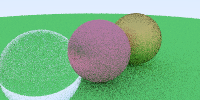

In [9]:
img = @time make_diffuse(200, 100, 10)

In [37]:
import Base.+
+(a::Vec3, b::Vec3) = new_add(a, b)

import Base.-
-(a::Vec3, b::Vec3) = Vec3(a.x - b.x, a.y - b.y, a.z - b.z)

import Base.*
*(a::Vec3, b::Vec3) = Vec3(a.x * b.x, a.y * b.y, a.z * b.z)

import Base./
/(a::Vec3, b::Vec3) = Vec3(a.x / b.x, a.y / b.y, a.z / a.z)

dot(a::Vec3, b::Vec3) = a.x * b.x + a.y * b.y + a.z * b.z

squared_length(a::Vec3) = a.x * a.x + a.y * a.y + a.z * a.z;

 11.195338 seconds (301.44 M allocations: 9.034 GiB, 16.38% gc time)


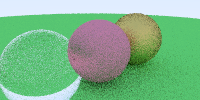

In [39]:
img = @time make_diffuse(200, 100, 10)

Nice! It looks like we exchanged some allocation time for actual computation time. Notice that our Heap allocations went down by 3 GB. This will scale nicely.

 46.408379 seconds (1.21 G allocations: 36.340 GiB, 16.00% gc time)


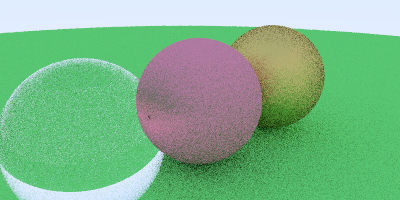

In [40]:
img = @time make_diffuse(400, 200, 10)

## NEXT UP

I'll spare you the gory details, I'll profile the rest of Vec3, HitRecord, and jump into multithreading. 

Remember, if your single threaded implementation is crap, the multitrheaded one will also be crap!